<a href="https://colab.research.google.com/github/smaciasg/Ejercicios_DataScience_Coding_Dojo/blob/main/Opci%C3%B3n_B_%C3%89xito_estudiantil_CL%C3%9ASTER_Y_RED_NEURONAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Problem**

An online school would like to better understand their students and predict which ones will pass the course and which will fail.  You have been provided with information about the students themselves as well as their performance in the course in order to 

1. Cluster students into groups and describe those groups and 
2. Create a predictive model that will predict which students will fail the course.

**Data notes:**

IMD stands for ‘Index of Multiple Deprivation’ and is a combination of several measures of socioeconomic deprivation in the neighborhood that the student is coming from.  A higher number means less deprivation and a lower number means the neighborhood is more deprived.

**Part 1: Clustering Instructions:**

An online school would like to segment their students into groups to see how different kinds of students differ.  They have asked you to do this and report back on how the groups are different and any important insights about kinds of students that come from this clustering.

**Load this dataset for clustering**

1. Explore the data and clean as needed
2. Prepare the data for modeling
3. Use a KMeans model to cluster the students into an optimal number of clusters. 
4. Use an elbow plot and silhouette score to find the optimal number of clusters.
5. There must be between 2 and 10 clusters.
6. Explain your choice of number of clusters
7. Analyze and report on the clusters.
8. Create 2 report quality explanatory visualizations showing important differences between the clusters.
9. Interpret and explain each visualization.

**Part 2: Modeling Instructions**

The online school has provided new data about the daily activities of each student on their learning platform, how early or late they completed each assessment, and which courses they were taking.  However, this has caused the data table to have over 900 columns.

*They would now like you to use this data to predict which students will pass the course and which will fail :* **passed_course is your target variable**

1. Load this dataset for modeling  **This is a different data set than used for part 1!**
2. The file is large, make sure to wait for it to fully upload before loading it into your dataframe
3. This dataset is pre-cleaned, but may need to be processed before modeling.  
4. Use random_state = 42 for your train_test_split
5. Apply PCA to reduce the number of features.
6. Compare how many columns are present before and after PCA
7. Do not leak data.
8. Use a deep learning model to predict which students will pass and which will fail
9. Create 3 different versions of a sequential model.
10. Each new model should be an iteration on the previous model.
11. Justify in writing why you changed what you did for each new model. (For example, why did you add layers, regularization, nodes, etc)
12. Use some form of regularization with at least one model.
13. Evaluate each model with multiple appropriate metrics.
14. Choose a final model and justify your choice.
15. Evaluate your final model with multiple metrics
16. Based on those metrics, explain in writing how well your model will solve the business problem.


#**PARTE 1: CLÚSTERS**

###**1) Importar librerías**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

###**2) Cargar datos y explorar**

In [2]:
df_cluster_estudiantes = pd.read_csv('/content/drive/MyDrive/CODING DOJO/DATA SCIENCE/BELT EXAM 3/Option_B_clustering - Option_B_clustering.csv')
df_cluster_estudiantes.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,1,2,9,2,0,240,0,1,78,85,80,85,82
1,0,2,2,1,0,60,0,1,70,68,70,64,60
2,0,3,5,1,0,60,0,1,72,71,74,88,75
3,0,1,5,0,0,60,0,1,69,30,63,35,75
4,1,2,3,0,0,60,0,1,70,65,62,75,68


In [3]:
#Exploración básica para saber si hay datos faltantes y el tipo de datos faltantes
df_cluster_estudiantes.info()
#No se observan datos faltantes en ninguna de las columnas y todos los datos son tienen el mismo tipo entero

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender                12737 non-null  int64
 1   highest_education     12737 non-null  int64
 2   imd_band              12737 non-null  int64
 3   age_band              12737 non-null  int64
 4   num_of_prev_attempts  12737 non-null  int64
 5   studied_credits       12737 non-null  int64
 6   disability            12737 non-null  int64
 7   passed_course         12737 non-null  int64
 8   assess_score_1        12737 non-null  int64
 9   assess_score_2        12737 non-null  int64
 10  assess_score_3        12737 non-null  int64
 11  assess_score_4        12737 non-null  int64
 12  assess_score_5        12737 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB


1. **Highest education**:	The latest level that students have before registering for the course
2. **IMD band**:	IMD stands for ‘Index of Multiple Deprivation’ and is a combination of several measures of socioeconomic deprivation in the neighborhood that the student is coming from.  A higher number means less deprivation and a lower number means the neighborhood is more deprived.
3. **Age band**:	The interval of student’s age
4. **Num of prev attempts**:	The number that students register for the course before
5. **Studied credits**:	The total credit hours of the courses for each student
6. **Disability**:	Disability for each student

In [4]:
#Vamos aa revisar si hay datos duplicados
df_cluster_estudiantes.duplicated().sum()

7

In [5]:
#Hay un total de 7 datos duplicados, por lo que se procede a su eliminación completa
df_cluster_estudiantes = df_cluster_estudiantes.drop_duplicates()
df_cluster_estudiantes.duplicated().sum()

0

In [6]:
#Vamos a mirar si hay datos anormales en las columnas
df_cluster_estudiantes.describe()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
count,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000
mean,0.446819,2.090102,4.407070,0.339199,0.107463,74.773763,0.091909,0.763001,73.987274,74.915240,79.734328,75.661822,78.106127
std,0.497183,0.940932,2.806379,0.488965,0.389890,37.459380,0.288909,0.425259,19.166495,14.654117,17.653542,17.967908,19.529946
min,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,60.000000,0.000000,1.000000,66.000000,66.000000,69.000000,65.000000,67.000000
50%,0.000000,2.000000,4.000000,0.000000,0.000000,60.000000,0.000000,1.000000,77.000000,76.000000,81.000000,79.000000,80.000000
75%,1.000000,3.000000,7.000000,1.000000,0.000000,90.000000,0.000000,1.000000,86.000000,86.000000,95.000000,89.000000,96.000000
max,1.000000,4.000000,9.000000,2.000000,6.000000,630.000000,1.000000,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000


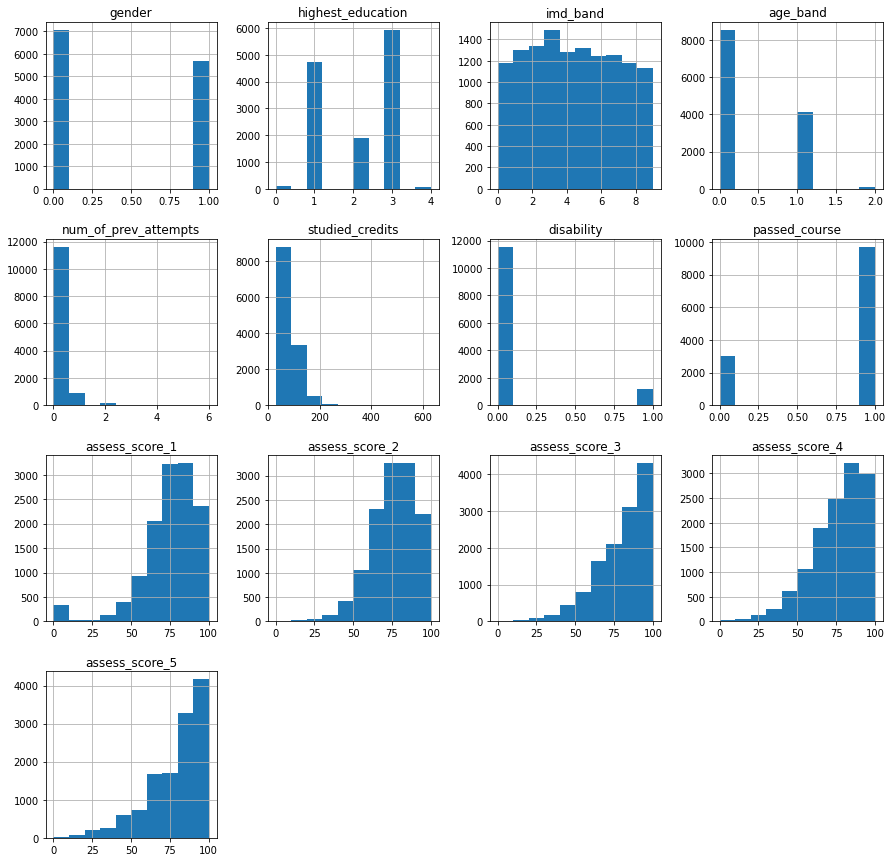

In [7]:
df_cluster_estudiantes.hist(figsize=(15,15))
plt.show();

In [8]:
df_cluster_estudiantes[['studied_credits']].value_counts()

studied_credits
60                 6818
120                2250
30                 1831
90                 1044
180                 240
150                 226
75                   57
240                  43
70                   41
210                  34
45                   15
100                  15
270                  14
80                   13
130                  12
135                  12
300                   8
40                    7
160                   6
110                   5
105                   5
165                   4
195                   4
170                   3
140                   3
190                   2
200                   2
220                   2
145                   2
250                   2
155                   1
325                   1
430                   1
360                   1
330                   1
235                   1
85                    1
280                   1
95                    1
630                   1
dtype: int64

In [9]:
#Tal como se observa en el histograma, la mayoría de los créditos de los estudiantes se encuentra entre 30 y los 90 créditos, así que tener créditos más allá de 200 podría ser un dato atípico
print(len(df_cluster_estudiantes.loc[df_cluster_estudiantes['studied_credits']>200,:]))
df_cluster_estudiantes.loc[df_cluster_estudiantes['studied_credits']>200,:]

110


,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,1,2,9,2,0,240,0,1,78,85,80,85,82
37,1,3,9,0,0,240,0,0,62,30,69,60,61
53,1,3,4,1,0,240,0,0,38,52,52,54,55
132,0,1,4,0,0,240,0,1,74,76,77,78,81
303,0,2,7,1,0,240,0,1,81,78,80,50,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,1,1,7,0,1,210,0,1,88,66,60,66,60
10284,1,3,4,0,0,430,0,1,92,96,70,30,83
10362,1,3,5,0,0,240,0,1,82,84,69,77,83
11045,0,3,9,1,0,240,0,1,64,74,75,62,70


In [10]:
#Elegimos un datafram con valores de créditos estudiantiles menores a 200, los que representa menos del 1% de los datos
df_cluster_estudiantes= df_cluster_estudiantes.loc[df_cluster_estudiantes['studied_credits']<=200,:]

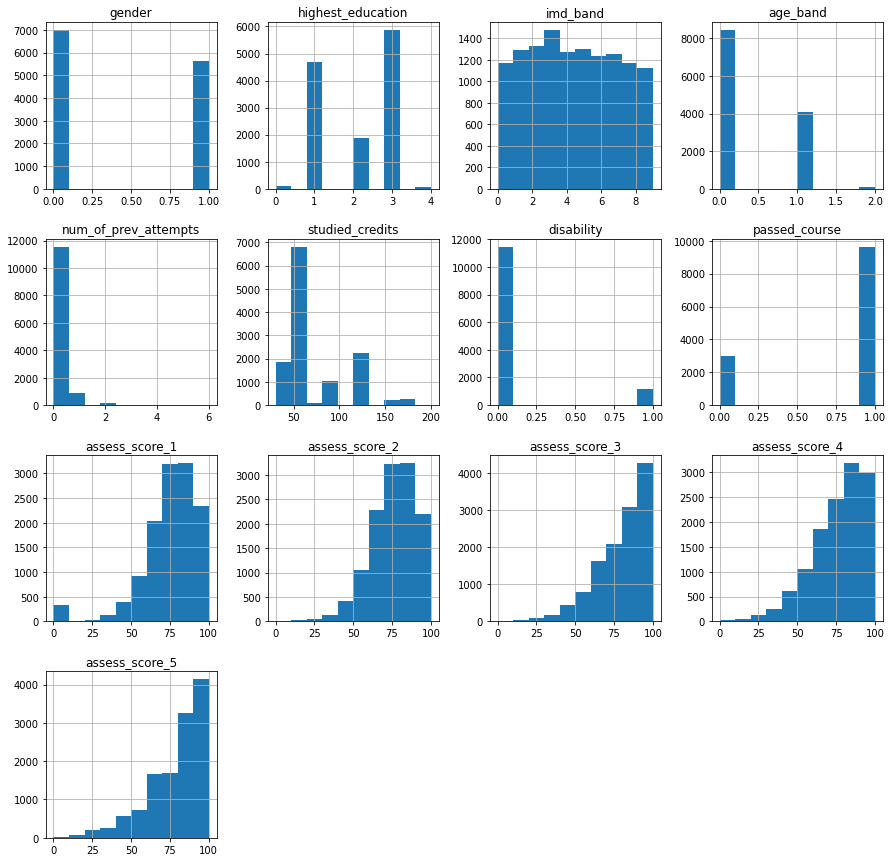

In [11]:
df_cluster_estudiantes.hist(figsize=(15,15))
plt.show();

###**3) Preparar los datos para modelar**

**Escalamiento**

In [12]:
#Dado que todos los datos son numéricos solo necesitamos un escalador
scaler = StandardScaler()
#Vamos a 
X_scaled = pd.DataFrame(scaler.fit_transform(df_cluster_estudiantes), columns=df_cluster_estudiantes.columns)
X_scaled.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,-0.898325,-0.094734,-0.858495,1.350298,-0.271299,-0.394526,-0.317549,0.555505,-0.206756,-0.474718,-0.552774,-0.653043,-0.931133
1,-0.898325,0.967968,0.210670,1.350298,-0.271299,-0.394526,-0.317549,0.555505,-0.102567,-0.269626,-0.326006,0.684241,-0.161813
2,-0.898325,-1.157436,0.210670,-0.694921,-0.271299,-0.394526,-0.317549,0.555505,-0.258851,-3.072547,-0.949618,-2.268928,-0.161813
3,1.113183,-0.094734,-0.502106,-0.694921,-0.271299,-0.394526,-0.317549,0.555505,-0.206756,-0.679810,-1.006310,-0.040121,-0.520829
4,-0.898325,0.967968,1.636223,-0.694921,-0.271299,1.388967,-0.317549,0.555505,-0.102567,-0.201262,-0.439390,-0.151562,-0.264389


**Identificación de los clúster adecuados**

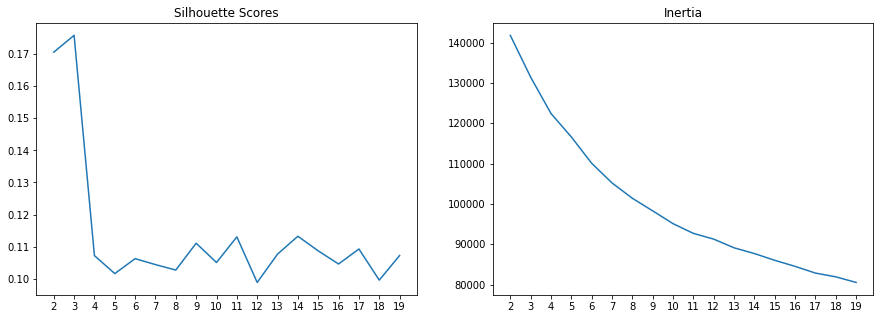

In [13]:
ks = range(2,20)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [14]:
for i in range(len(inertias)):
  if i < len(inertias)-1:
    print(f'C{i+2} - C{i+3}: Decremento: {inertias[i+1]-inertias[i]}')


C2 - C3: Decremento: -10347.529649335134
C3 - C4: Decremento: -9017.011352937989
C4 - C5: Decremento: -5811.542313705097
C5 - C6: Decremento: -6522.73380317878
C6 - C7: Decremento: -4871.534995626469
C7 - C8: Decremento: -3809.518274377333
C8 - C9: Decremento: -3118.0353247941966
C9 - C10: Decremento: -3172.158428490773
C10 - C11: Decremento: -2407.979869125149
C11 - C12: Decremento: -1428.1117732153216
C12 - C13: Decremento: -2148.2957054273575
C13 - C14: Decremento: -1423.9954052304383
C14 - C15: Decremento: -1674.2581882939412
C15 - C16: Decremento: -1500.5453921819426
C16 - C17: Decremento: -1664.4453988987952
C17 - C18: Decremento: -930.5428500813432
C18 - C19: Decremento: -1388.649337857496


**Elección:**

1. De acuerdo con el Silhouette Scores, el mejor número de clústers a elegir es tres.
2. Con respecto a la gráfica de inercia, los cambios de pendientes más grandes se dan entre 2 y 8 clúster, donde el decremento es mayor a 3000, luego hasta el clúster 6 se vería una variación significativa, pero siendo las más significatavias hasra el clúster 3 y 4.

En resumen elegir entre 3 y 4 clúster podría representar de forma adecuada la población, en nuestro caso elegiremos 3 clúster.

###**5) Creación del modelo con los clúster elegidos**

In [15]:
# Se refina kmeans con los 3 clúster
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
# Se añade la columna de la clasificación del clúster al dataframe original
df_cluster_estudiantes['cluster'] = kmeans.labels_
df_cluster_estudiantes.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5,cluster
1,0,2,2,1,0,60,0,1,70,68,70,64,60,1
2,0,3,5,1,0,60,0,1,72,71,74,88,75,0
3,0,1,5,0,0,60,0,1,69,30,63,35,75,1
4,1,2,3,0,0,60,0,1,70,65,62,75,68,1
5,0,3,9,0,0,120,0,1,72,72,72,73,73,0


**Analizar los clústers**

In [16]:
cluster_groups = df_cluster_estudiantes.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,0,0.437288,2.168579,4.745763,0.378357,0.076662,70.835724,0.000000,0.909648,79.852021,80.699739,86.781226,83.329596,86.322425
1,1,0.487696,1.961257,3.874607,0.277487,0.150000,77.526178,0.006806,0.489791,62.476178,63.869634,66.326963,60.564660,62.058115
2,2,0.370796,1.982301,3.928319,0.288496,0.142478,75.433628,1.000000,0.704425,72.887611,73.313274,77.407080,75.302655,77.133628


In [17]:
cluster_groups = df_cluster_estudiantes.groupby('cluster', as_index=False).median()
cluster_groups

,cluster,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,0,0.0,2.0,5.0,0.0,0.0,60.0,0.0,1.0,80.0,82.0,88.0,84.0,88.0
1,1,0.0,2.0,4.0,0.0,0.0,60.0,0.0,0.0,67.0,65.0,67.0,61.0,62.0
2,2,0.0,2.0,4.0,0.0,0.0,60.0,1.0,1.0,75.0,75.0,80.0,78.0,80.0


In [18]:
df_cluster_estudiantes.pivot_table(index=['cluster'], columns=['gender'],values=['imd_band'], aggfunc='count')

imd_band      
gender         0     1
cluster               
0           4316  3354
1           1957  1863
2            711   419

In [19]:
df_cluster_estudiantes.pivot_table(index=['cluster'], columns=['age_band'],values=['imd_band'], aggfunc='count')

imd_band              
age_band        0       1     2
cluster                        
0          4843.0  2752.0  75.0
1          2778.0  1024.0  18.0
2           804.0   326.0   NaN

In [20]:
df_cluster_estudiantes.pivot_table(index=['cluster'], columns=['highest_education'],values=['imd_band'], aggfunc='count')

imd_band                              
highest_education        0       1       2       3     4
cluster                                                 
0                     40.0  2499.0  1330.0  3730.0  71.0
1                     54.0  1660.0   497.0  1598.0  11.0
2                      2.0   546.0    52.0   530.0   NaN

**Visualizar los clústeres**

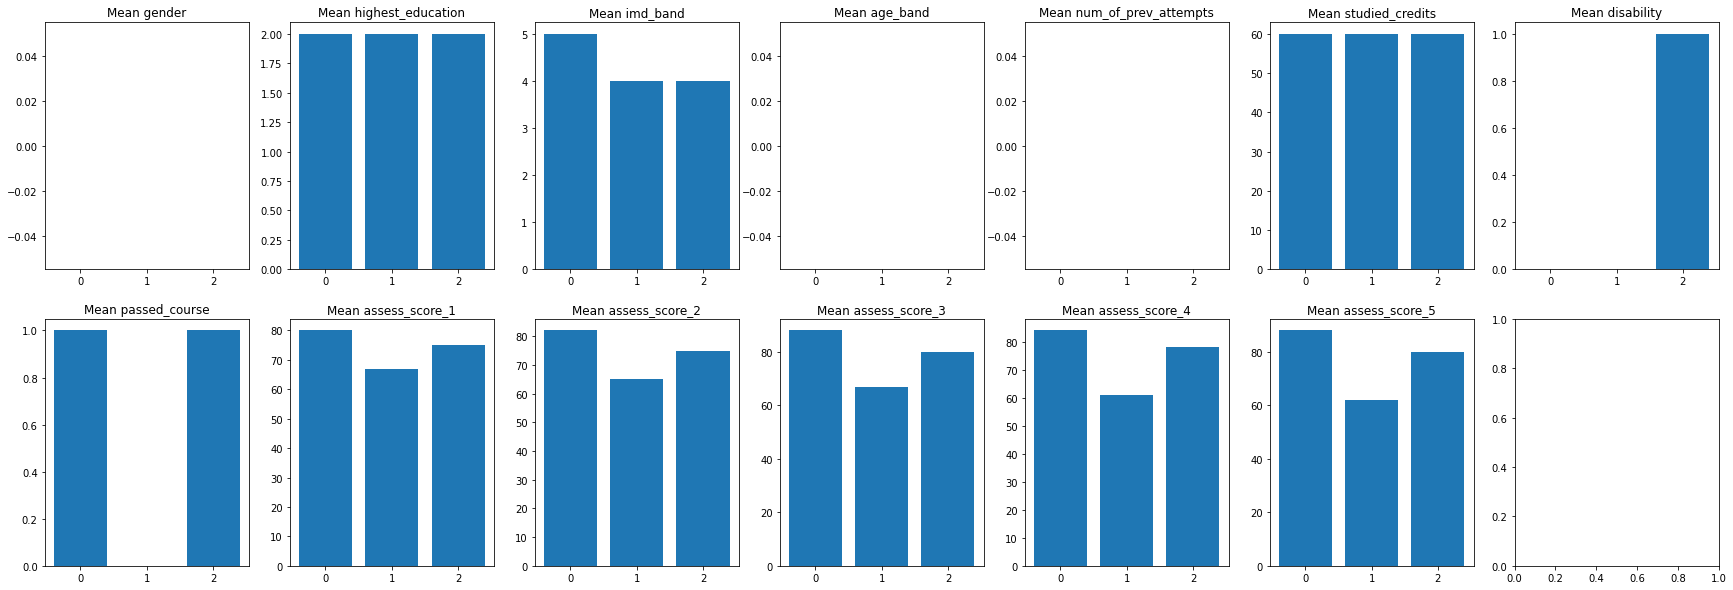

In [21]:
# Visualizaciones de los grupos
fig, axes = plt.subplots(2,7, figsize = (30, 10))
axes = axes.ravel()
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

**Clúster 0:**

Es un grupo en el cual aproximadamente el 44% de la población pertenece al género 1, tienen la mejor condición escolar superando, posiblemente la mayoría, la puntuación 2 de la característica highest_education, de igual forma es el grupo donde se presenta la mejor condición socioeconómica de las personas, estando la media cercana a 5, también es el grupo donde la banda de edad es más alta, es decir, varios de los estudiantes están en las franjas de edad superior, es el grupo, donde se presentan la menor cantidad de repitentes, la media de créditos es menor al resto de grupos, no presentan discapacidades, más del 80% supera el curso, siendo el clúster de mejor desempeño, en las calificaciones de la 1 a la 5 están cerca o más allá del 80. En conclusión, es el mejor grupo en cuanto a desempeño académico, con altas probabilidades de éxito, con características más elevadas en su indicador socioeconómico.


**Clúster 1:**

Es el clúster donde hay casi una distribución equitativa entre ambos géneros, es el grupo con el menor grado escolar, de igual manera tienen el IMD medio más bajo, lo que podría representar personas con dificultad económica, aunque comparte cercanía en esta característica con el clúster 2, es el grupo pre presenta mayor representación en la característica asociada a la repitencia de curso, también es el grupo con la mayor cantidad de créditos estudiados, posiblemente asociado a la repitencia, algunos de ellos presentan discapacidades, pero es una baja proporción de la población, son el grupo que más tendencia tiene a no pasar el curso, su historial lo confirma, y son aquellos que tienen la menor de las puntuaciones en todas las pruebas, un promedio cercano al 60. En conclusión, este es el grupo de los que normalmente reprueban, son repitentes, usan la mayor cantidad de créditos.


**Clúster 2:**

Es aquél con el mayor desbalance en los géneros, prevaleciendo el género 0, su nivel educativo llega hasta el nivel 3, pero al igual que el clúster 0, tiene una población relativamente balanceada entre el nivel 1 y 3, en la banda de edad es el único grupo que no tiene población en la banda 2, siendo la mayoría de la banda 0, son el segundo clúster en presentar alta repitencia, el uso de créditos está entre el clúster 0 y 1, siendo cercana a 75, su característica más relevante, es que concentra casi toda la población con algún tipo de discapacidad, pero a diferencia del clúster 1, de compartir casi las mismas puntuaciones socioeconómicas, tener una repitencia parecida, es más probable que este grupo apruebe el curso al repetirlo o verlo la primera vez, sus puntuaciones medias con intermedias y cercanas a 70.


#**PARTE 2: PREDICCIONES**

###**1) Carga de los datos**

In [22]:
df_modelo_exito = pd.read_csv('/content/drive/MyDrive/CODING DOJO/DATA SCIENCE/BELT EXAM 3/Option_B_modeling.csv')
df_modelo_exito.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,...,module_CCC,module_DDD,module_EEE,module_FFF,module_GGG,presentation_0,presentation_2013B,presentation_2013J,presentation_2014B,presentation_2014J
0,1,2,9,2,0,240,0,1,78.0,85.0,...,0,0,0,0,0,0,0,1,0,0
1,0,2,2,1,0,60,0,1,70.0,68.0,...,0,0,0,0,0,0,0,1,0,0
2,0,3,5,1,0,60,0,1,72.0,71.0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,5,0,0,60,0,1,69.0,30.0,...,0,0,0,0,0,0,0,1,0,0
4,1,2,3,0,0,60,0,1,70.0,65.0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
df_modelo_exito['passed_course'].value_counts()

1    9720
0    3017
Name: passed_course, dtype: int64

In [24]:
df_modelo_exito.info()
#Se observa que todos los dato son numéricos, por lo que no se requiere de un onehotencoder para la transformación, podría ser un min/max, más aún sabiendo que la salida es binaria

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Columns: 931 entries, gender to presentation_2014J
dtypes: float64(910), int64(21)
memory usage: 90.5 MB


###**2) Importar las librerías necesarias para PCA**

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import  make_pipeline
from sklearn.decomposition import PCA

###**3) Dividir los datos**

In [187]:
X = df_modelo_exito.drop(columns='passed_course')
y= df_modelo_exito['passed_course']
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=42, stratify=y)

In [188]:
# Instanciar Escalador Estándar
scaler = MinMaxScaler()
# Ajustar y transformar datos
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###**4) Aplicar PCA**

In [254]:
pca = PCA(n_components=0.97) #El PCA se elige por la variabilidad que se pretender explicar con las columnas que queden
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Validación del número de columnas antes y después**

In [255]:
print(f'Número de columnas X entrenamiento sin PCA: {X_train.shape[1]}')
print(f'Número de columnas X entrenamiento CON PCA: {X_train_pca.shape[1]}')

Número de columnas X entrenamiento sin PCA: 930
Número de columnas X entrenamiento CON PCA: 332


###**5) Crear modelo de clasificación binaria para predecir**

**Importar las librerías necesarias para el modelo de deep learning**

In [256]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [257]:
input_shape = X_train_pca.shape[1]
input_shape

332

####**MODELO 1**

In [258]:
model = Sequential()
# Primera capa oculta
model.add(Dense(32, 
                input_dim = input_shape,
                activation = 'relu'))
model.add(Dense(16, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy','AUC','Precision','Recall'])
proceso = model.fit(X_train_pca, y_train,
                    validation_data = (X_test_pca, y_test), 
                    epochs=20)

Epoch 1/20
299/299 [==============================] - 3s 7ms/step - loss: 0.4340 - accuracy: 0.8121 - auc: 0.8080 - precision: 0.8249 - recall: 0.9569 - val_loss: 0.3336 - val_accuracy: 0.8675 - val_auc: 0.8887 - val_precision: 0.8865 - val_recall: 0.9478
Epoch 2/20
299/299 [==============================] - 2s 5ms/step - loss: 0.3003 - accuracy: 0.8800 - auc: 0.9083 - precision: 0.8962 - recall: 0.9532 - val_loss: 0.3180 - val_accuracy: 0.8703 - val_auc: 0.8937 - val_precision: 0.8782 - val_recall: 0.9638
Epoch 3/20
299/299 [==============================] - 2s 7ms/step - loss: 0.2724 - accuracy: 0.8925 - auc: 0.9243 - precision: 0.9054 - recall: 0.9594 - val_loss: 0.3176 - val_accuracy: 0.8747 - val_auc: 0.8921 - val_precision: 0.8950 - val_recall: 0.9469
Epoch 4/20
299/299 [==============================] - 2s 6ms/step - loss: 0.2527 - accuracy: 0.9002 - auc: 0.9355 - precision: 0.9131 - recall: 0.9606 - val_loss: 0.3214 - val_accuracy: 0.8732 - val_auc: 0.8899 - val_precision: 0.89

**Validación de la pérdida**

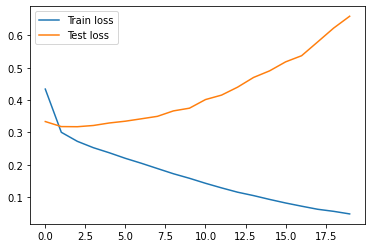

In [259]:
plt.plot(proceso.history['loss'], label='Train loss')
plt.plot(proceso.history['val_loss'], label='Test loss')
plt.legend();

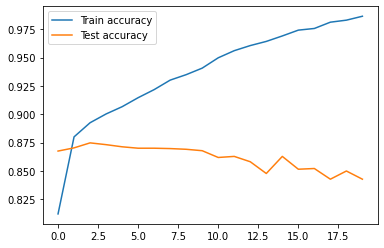

In [260]:
plt.plot(proceso.history['accuracy'], label='Train accuracy')
plt.plot(proceso.history['val_accuracy'], label='Test accuracy')
plt.legend();

In [261]:
score = model.evaluate(X_test_pca, y_test)
print('Val accuracy:', score[1])

100/100 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.8427 - auc: 0.8522 - precision: 0.8923 - recall: 0.9029
Val accuracy: 0.842700183391571


####**MODELO 2**

El primer modelo sufría de sobre ajuste en el entrenamiento, pero una valor de preducción relativamente malo

In [262]:
model = Sequential()
# Primera capa oculta
model.add(Dense(32, 
                input_dim = input_shape,
                activation = 'relu'))
#Se agrega un Droout para prevenir el sobre ajuste en el entrenamiento
model.add(Dropout(0.2))
#Se agrega una capa adicional para validar si es posible aumentar la exactitud del modelo
model.add(Dense(16, 
                activation = 'relu'))
#Se agrega un Droout para prevenir el sobre ajuste en el entrenamiento
model.add(Dropout(0.2))
model.add(Dense(16, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy','AUC','Precision','Recall'])
proceso = model.fit(X_train_pca, y_train,
                    validation_data = (X_test_pca, y_test), 
                    epochs=10) #Se cambia el número de épocas para reducir el sobreajuste

Epoch 1/10
299/299 [==============================] - 3s 7ms/step - loss: 0.4932 - accuracy: 0.7547 - auc: 0.7167 - precision: 0.7823 - recall: 0.9402 - val_loss: 0.3603 - val_accuracy: 0.8631 - val_auc: 0.8803 - val_precision: 0.8735 - val_recall: 0.9597
Epoch 2/10
299/299 [==============================] - 2s 6ms/step - loss: 0.3401 - accuracy: 0.8626 - auc: 0.8859 - precision: 0.8786 - recall: 0.9514 - val_loss: 0.3256 - val_accuracy: 0.8662 - val_auc: 0.8913 - val_precision: 0.8881 - val_recall: 0.9436
Epoch 3/10
299/299 [==============================] - 2s 5ms/step - loss: 0.3028 - accuracy: 0.8818 - auc: 0.9075 - precision: 0.8962 - recall: 0.9558 - val_loss: 0.3184 - val_accuracy: 0.8728 - val_auc: 0.8923 - val_precision: 0.8893 - val_recall: 0.9519
Epoch 4/10
299/299 [==============================] - 2s 6ms/step - loss: 0.2815 - accuracy: 0.8932 - auc: 0.9199 - precision: 0.9071 - recall: 0.9582 - val_loss: 0.3204 - val_accuracy: 0.8722 - val_auc: 0.8916 - val_precision: 0.89

**Validación de la pérdida**

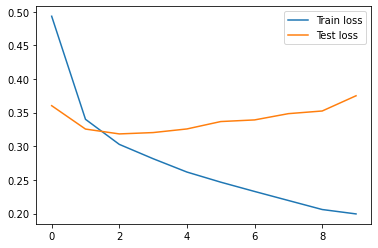

In [263]:
plt.plot(proceso.history['loss'], label='Train loss')
plt.plot(proceso.history['val_loss'], label='Test loss')
plt.legend();

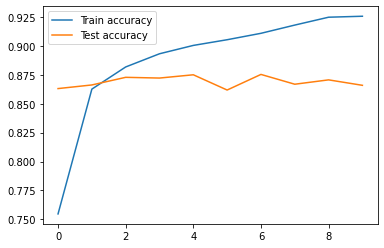

In [264]:
plt.plot(proceso.history['accuracy'], label='Train accuracy')
plt.plot(proceso.history['val_accuracy'], label='Test accuracy')
plt.legend();

In [265]:
score = model.evaluate(X_test_pca, y_test)
print('Val accuracy:', score[1])

100/100 [==============================] - 0s 4ms/step - loss: 0.3751 - accuracy: 0.8659 - auc: 0.8784 - precision: 0.8923 - recall: 0.9375
Val accuracy: 0.8659340739250183


####**MODELO 3**

El modelo sigue teniendo un bajo desempeño, por ello se van aumetar el número de neuronas en las primeras capas

In [278]:
model = Sequential()
# Primera capa oculta
model.add(Dense(32, 
                input_dim = input_shape,
                activation = 'relu'))
#Se agrega un Droout para prevenir el sobre ajuste en el entrenamiento
model.add(Dropout(0.3))
#Se agrega una capa adicional para validar si es posible aumentar la exactitud del modelo
model.add(Dense(16, 
                activation = 'relu'))
#Se agrega un Droout para prevenir el sobre ajuste en el entrenamiento
model.add(Dropout(0.2))
model.add(Dense(16, 
                activation = 'relu'))
#Se agrega un Droout para prevenir el sobre ajuste en el entrenamiento
model.add(Dropout(0.2))
model.add(Dense(16, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
early_stopping = EarlyStopping(patience=2) #Se tenía un early stopping de 5 y se obtenía un menor desempeño, se reduce a 4, esto dado que la pérdida aumenta rápidamente
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy','AUC','Precision','Recall'])
proceso = model.fit(X_train_pca, y_train,
                    validation_data = (X_test_pca, y_test), 
                    epochs=20,
                    callbacks = [early_stopping]) #Se agrega una parada

Epoch 1/20
299/299 [==============================] - 4s 9ms/step - loss: 0.4743 - accuracy: 0.7835 - auc: 0.7517 - precision: 0.7929 - recall: 0.9695 - val_loss: 0.3494 - val_accuracy: 0.8597 - val_auc: 0.8881 - val_precision: 0.8729 - val_recall: 0.9552
Epoch 2/20
299/299 [==============================] - 2s 6ms/step - loss: 0.3470 - accuracy: 0.8644 - auc: 0.8797 - precision: 0.8856 - recall: 0.9443 - val_loss: 0.3238 - val_accuracy: 0.8725 - val_auc: 0.8971 - val_precision: 0.8831 - val_recall: 0.9601
Epoch 3/20
299/299 [==============================] - 2s 6ms/step - loss: 0.3128 - accuracy: 0.8785 - auc: 0.8998 - precision: 0.8935 - recall: 0.9545 - val_loss: 0.3171 - val_accuracy: 0.8703 - val_auc: 0.8980 - val_precision: 0.8816 - val_recall: 0.9589
Epoch 4/20
299/299 [==============================] - 2s 6ms/step - loss: 0.2985 - accuracy: 0.8866 - auc: 0.9103 - precision: 0.9000 - recall: 0.9579 - val_loss: 0.3120 - val_accuracy: 0.8763 - val_auc: 0.8978 - val_precision: 0.88

**Validación de la pérdida**

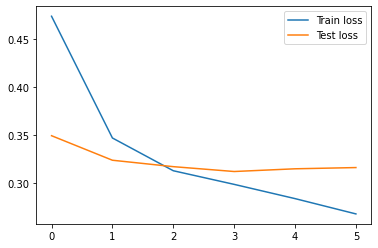

In [279]:
plt.plot(proceso.history['loss'], label='Train loss')
plt.plot(proceso.history['val_loss'], label='Test loss')
plt.legend();

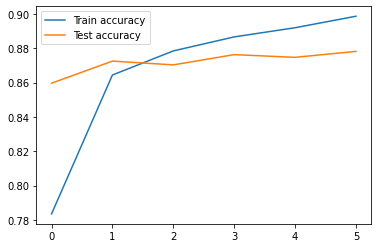

In [280]:
plt.plot(proceso.history['accuracy'], label='Train accuracy')
plt.plot(proceso.history['val_accuracy'], label='Test accuracy')
plt.legend();

In [281]:
score = model.evaluate(X_test_pca, y_test)
print('Val accuracy:', score[1])

100/100 [==============================] - 0s 4ms/step - loss: 0.3161 - accuracy: 0.8782 - auc: 0.8954 - precision: 0.8995 - recall: 0.9461
Val accuracy: 0.8781789541244507


###**ELECCIÓN DEL MODELO FINAL**

El modelo a elegir sería el 3, luego de correrlo varias veces el que único que en la mayoría de las veces alcanza un accuracy superior al 86.5%; por otro lado, presenta la menor pérdida y menor sobre ajuste.

Con relación a las métricas adicionales el modelo 3 tiene el mayor AUC, indicando que la mayoría de las veces se hace la clasificación de forma correcta, reduciendo la posibilidad de falsos negativo o falsos positivos.

Por otro lado, el último modelo tiene una regilarización de early stopping, ello mejora el tiempo de entrenamiento en comparación a los demás modelos.

Dentro de los tres modelos el modelo 3 es el que tiene mejor precisión (menor cantidad de falsos positivos) y sensibilidad (menor cantidad de falsos negativos)
